## Word Embeddings
...
word2vec model, t-SNE scatterplot

In [88]:
#import libraries 
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [89]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [90]:
#set configuration/OHCO params
OHCO = ['text_id', 'para_num', 'sent_num', 'token_num', 'author', 'title']
BAG = OHCO[:2] # Paragraphs
# BAG = OHCO[:4] # Sentences
window = 5

In [91]:
#Import TOKENS 
TOKENS = pd.read_csv("TOKEN_expanded.csv").set_index(OHCO)
TOKENS.head()

pos_tuple  \
text_id para_num sent_num token_num author    title                                   
1       16       0        0         Aristotle NicomachaenEthics     ('Every', 'DT')   
                          1         Aristotle NicomachaenEthics       ('art', 'NN')   
                          2         Aristotle NicomachaenEthics       ('and', 'CC')   
                          3         Aristotle NicomachaenEthics     ('every', 'DT')   
                          4         Aristotle NicomachaenEthics  ('inquiry,', 'NN')   

                                                                pos token_str  \
text_id para_num sent_num token_num author    title                             
1       16       0        0         Aristotle NicomachaenEthics  DT     Every   
                          1         Aristotle NicomachaenEthics  NN       art   
                          2         Aristotle NicomachaenEthics  CC       and   
                          3         Aristotle NicomachaenEthics  DT     every   
                          4         Aristotle NicomachaenEthics  NN  inquiry,   

                                                                term_str  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    every   
                          1         Aristotle NicomachaenEthics      art   
                          2         Aristotle NicomachaenEthics      and   
                          3         Aristotle NicomachaenEthics    every   
                          4         Aristotle NicomachaenEthics  inquiry   

                                                                 term_id  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    15890   
                          1         Aristotle NicomachaenEthics     2942   
                          2         Aristotle NicomachaenEthics     1976   
                          3         Aristotle NicomachaenEthics    15890   
                          4         Aristotle NicomachaenEthics    23364   

                                                                                                          file  \
text_id para_num sent_num token_num author    title                                                              
1       16       0        0         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          1         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          2         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          3         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          4         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   

                                                                gender  \
text_id para_num sent_num token_num author    title                      
1       16       0        0         Aristotle NicomachaenEthics      M   
                          1         Aristotle NicomachaenEthics      M   
                          2         Aristotle NicomachaenEthics      M   
                          3         Aristotle NicomachaenEthics      M   
                          4         Aristotle NicomachaenEthics      M   

                                                                     era  
text_id para_num sent_num token_num author    title                       
1       16       0        0         Aristotle NicomachaenEthics  ancient  
                          1         Aristotle NicomachaenEthics  ancient  
                          2         Aristotle NicomachaenEthics  ancient  
                          3         Aristotle NicomachaenEthics  ancient  
                          4         Aristotle NicomachaenEthic

In [92]:
#create table of female authors
female = TOKENS[TOKENS.gender == 'F']
female.head()

pos_tuple  \
text_id para_num sent_num token_num author       title                                             
7       501      0        0         HannahArendt TheOriginsofTotalitarianism      ('Many', 'JJ')   
                          1         HannahArendt TheOriginsofTotalitarianism     ('still', 'RB')   
                          2         HannahArendt TheOriginsofTotalitarianism  ('consider', 'VB')   
                          3         HannahArendt TheOriginsofTotalitarianism       ('it', 'PRP')   
                          4         HannahArendt TheOriginsofTotalitarianism        ('an', 'DT')   

                                                                              pos  \
text_id para_num sent_num token_num author       title                              
7       501      0        0         HannahArendt TheOriginsofTotalitarianism   JJ   
                          1         HannahArendt TheOriginsofTotalitarianism   RB   
                          2         HannahArendt TheOriginsofTotalitarianism   VB   
                          3         HannahArendt TheOriginsofTotalitarianism  PRP   
                          4         HannahArendt TheOriginsofTotalitarianism   DT   

                                                                             token_str  \
text_id para_num sent_num token_num author       title                                   
7       501      0        0         HannahArendt TheOriginsofTotalitarianism      Many   
                          1         HannahArendt TheOriginsofTotalitarianism     still   
                          2         HannahArendt TheOriginsofTotalitarianism  consider   
                          3         HannahArendt TheOriginsofTotalitarianism        it   
                          4         HannahArendt TheOriginsofTotalitarianism        an   

                                                                              term_str  \
text_id para_num sent_num token_num author       title                                   
7       501      0        0         HannahArendt TheOriginsofTotalitarianism      many   
                          1         HannahArendt TheOriginsofTotalitarianism     still   
                          2         HannahArendt TheOriginsofTotalitarianism  consider   
                          3         HannahArendt TheOriginsofTotalitarianism        it   
                          4         HannahArendt TheOriginsofTotalitarianism        an   

                                                                              term_id  \
text_id para_num sent_num token_num author       title                                  
7       501      0        0         HannahArendt TheOriginsofTotalitarianism    27510   
                          1         HannahArendt TheOriginsofTotalitarianism    42920   
                          2         HannahArendt TheOriginsofTotalitarianism     8932   
                          3         HannahArendt TheOriginsofTotalitarianism    24364   
                          4         HannahArendt TheOriginsofTotalitarianism     1890   

                                                                                                                           file  \
text_id para_num sent_num token_num author       title                                                                            
7       501      0        0         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          1         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          2         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          3         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTotalitar...   
                          4         HannahArendt TheOriginsofTotalitarianism  philostexts\HannahArendt_TheOriginsofTot

In [93]:
#create table of male authors
male = TOKENS[TOKENS.gender == 'M']
male.head()

pos_tuple  \
text_id para_num sent_num token_num author    title                                   
1       16       0        0         Aristotle NicomachaenEthics     ('Every', 'DT')   
                          1         Aristotle NicomachaenEthics       ('art', 'NN')   
                          2         Aristotle NicomachaenEthics       ('and', 'CC')   
                          3         Aristotle NicomachaenEthics     ('every', 'DT')   
                          4         Aristotle NicomachaenEthics  ('inquiry,', 'NN')   

                                                                pos token_str  \
text_id para_num sent_num token_num author    title                             
1       16       0        0         Aristotle NicomachaenEthics  DT     Every   
                          1         Aristotle NicomachaenEthics  NN       art   
                          2         Aristotle NicomachaenEthics  CC       and   
                          3         Aristotle NicomachaenEthics  DT     every   
                          4         Aristotle NicomachaenEthics  NN  inquiry,   

                                                                term_str  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    every   
                          1         Aristotle NicomachaenEthics      art   
                          2         Aristotle NicomachaenEthics      and   
                          3         Aristotle NicomachaenEthics    every   
                          4         Aristotle NicomachaenEthics  inquiry   

                                                                 term_id  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    15890   
                          1         Aristotle NicomachaenEthics     2942   
                          2         Aristotle NicomachaenEthics     1976   
                          3         Aristotle NicomachaenEthics    15890   
                          4         Aristotle NicomachaenEthics    23364   

                                                                                                          file  \
text_id para_num sent_num token_num author    title                                                              
1       16       0        0         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          1         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          2         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          3         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          4         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   

                                                                gender  \
text_id para_num sent_num token_num author    title                      
1       16       0        0         Aristotle NicomachaenEthics      M   
                          1         Aristotle NicomachaenEthics      M   
                          2         Aristotle NicomachaenEthics      M   
                          3         Aristotle NicomachaenEthics      M   
                          4         Aristotle NicomachaenEthics      M   

                                                                     era  
text_id para_num sent_num token_num author    title                       
1       16       0        0         Aristotle NicomachaenEthics  ancient  
                          1         Aristotle NicomachaenEthics  ancient  
                          2         Aristotle NicomachaenEthics  ancient  
                          3         Aristotle NicomachaenEthics  ancient  
                          4         Aristotle NicomachaenEthic

In [94]:
#create table for era = ancient
ancient = TOKENS[TOKENS.era == 'ancient']
ancient.head()

pos_tuple  \
text_id para_num sent_num token_num author    title                                   
1       16       0        0         Aristotle NicomachaenEthics     ('Every', 'DT')   
                          1         Aristotle NicomachaenEthics       ('art', 'NN')   
                          2         Aristotle NicomachaenEthics       ('and', 'CC')   
                          3         Aristotle NicomachaenEthics     ('every', 'DT')   
                          4         Aristotle NicomachaenEthics  ('inquiry,', 'NN')   

                                                                pos token_str  \
text_id para_num sent_num token_num author    title                             
1       16       0        0         Aristotle NicomachaenEthics  DT     Every   
                          1         Aristotle NicomachaenEthics  NN       art   
                          2         Aristotle NicomachaenEthics  CC       and   
                          3         Aristotle NicomachaenEthics  DT     every   
                          4         Aristotle NicomachaenEthics  NN  inquiry,   

                                                                term_str  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    every   
                          1         Aristotle NicomachaenEthics      art   
                          2         Aristotle NicomachaenEthics      and   
                          3         Aristotle NicomachaenEthics    every   
                          4         Aristotle NicomachaenEthics  inquiry   

                                                                 term_id  \
text_id para_num sent_num token_num author    title                        
1       16       0        0         Aristotle NicomachaenEthics    15890   
                          1         Aristotle NicomachaenEthics     2942   
                          2         Aristotle NicomachaenEthics     1976   
                          3         Aristotle NicomachaenEthics    15890   
                          4         Aristotle NicomachaenEthics    23364   

                                                                                                          file  \
text_id para_num sent_num token_num author    title                                                              
1       16       0        0         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          1         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          2         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          3         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   
                          4         Aristotle NicomachaenEthics  philostexts\Aristotle_NicomachaenEthics-1.txt   

                                                                gender  \
text_id para_num sent_num token_num author    title                      
1       16       0        0         Aristotle NicomachaenEthics      M   
                          1         Aristotle NicomachaenEthics      M   
                          2         Aristotle NicomachaenEthics      M   
                          3         Aristotle NicomachaenEthics      M   
                          4         Aristotle NicomachaenEthics      M   

                                                                     era  
text_id para_num sent_num token_num author    title                       
1       16       0        0         Aristotle NicomachaenEthics  ancient  
                          1         Aristotle NicomachaenEthics  ancient  
                          2         Aristotle NicomachaenEthics  ancient  
                          3         Aristotle NicomachaenEthics  ancient  
                          4         Aristotle NicomachaenEthic

In [95]:
#create table for era = classical
classical = TOKENS[TOKENS.era == 'classical']
classical.head()

pos_tuple  \
text_id para_num sent_num token_num author            title                                        
8       154      0        0         HarrietTaylorMill EnfranchisementofWomen     ('Most', 'JJS')   
                          1         HarrietTaylorMill EnfranchisementofWomen        ('of', 'IN')   
                          2         HarrietTaylorMill EnfranchisementofWomen     ('our', 'PRP$')   
                          3         HarrietTaylorMill EnfranchisementofWomen  ('readers', 'NNS')   
                          4         HarrietTaylorMill EnfranchisementofWomen      ('will', 'MD')   

                                                                               pos  \
text_id para_num sent_num token_num author            title                          
8       154      0        0         HarrietTaylorMill EnfranchisementofWomen   JJS   
                          1         HarrietTaylorMill EnfranchisementofWomen    IN   
                          2         HarrietTaylorMill EnfranchisementofWomen  PRP$   
                          3         HarrietTaylorMill EnfranchisementofWomen   NNS   
                          4         HarrietTaylorMill EnfranchisementofWomen    MD   

                                                                             token_str  \
text_id para_num sent_num token_num author            title                              
8       154      0        0         HarrietTaylorMill EnfranchisementofWomen      Most   
                          1         HarrietTaylorMill EnfranchisementofWomen        of   
                          2         HarrietTaylorMill EnfranchisementofWomen       our   
                          3         HarrietTaylorMill EnfranchisementofWomen   readers   
                          4         HarrietTaylorMill EnfranchisementofWomen      will   

                                                                             term_str  \
text_id para_num sent_num token_num author            title                             
8       154      0        0         HarrietTaylorMill EnfranchisementofWomen     most   
                          1         HarrietTaylorMill EnfranchisementofWomen       of   
                          2         HarrietTaylorMill EnfranchisementofWomen      our   
                          3         HarrietTaylorMill EnfranchisementofWomen  readers   
                          4         HarrietTaylorMill EnfranchisementofWomen     will   

                                                                              term_id  \
text_id para_num sent_num token_num author            title                             
8       154      0        0         HarrietTaylorMill EnfranchisementofWomen    29224   
                          1         HarrietTaylorMill EnfranchisementofWomen    31100   
                          2         HarrietTaylorMill EnfranchisementofWomen    31783   
                          3         HarrietTaylorMill EnfranchisementofWomen    37049   
                          4         HarrietTaylorMill EnfranchisementofWomen    49547   

                                                                                                                           file  \
text_id para_num sent_num token_num author            title                                                                       
8       154      0        0         HarrietTaylorMill EnfranchisementofWomen  philostexts\HarrietTaylorMill_Enfranchisemento...   
                          1         HarrietTaylorMill EnfranchisementofWomen  philostexts\HarrietTaylorMill_Enfranchisemento...   
                          2         HarrietTaylorMill EnfranchisementofWomen  philostexts\HarrietTaylorMill_Enfranchisemento...   
                          3         HarrietTaylorMill EnfranchisementofWomen  philostexts\HarrietTaylorMill_Enfranchisemento...   
                          4         HarrietTaylorMill EnfranchisementofWomen  philostexts\HarrietTaylorMill_Enfranchis

In [96]:
#create table for era = modern
modern = TOKENS[TOKENS.era == 'modern']
modern.head()

pos_tuple  \
text_id para_num sent_num token_num author   title                                   
5       1080     0        0         Foucault TheOrderofThings        ('The', 'DT')   
                          1         Foucault TheOrderofThings    ('painter', 'NN')   
                          2         Foucault TheOrderofThings        ('is', 'VBZ')   
                          3         Foucault TheOrderofThings  ('standing', 'VBG')   
                          4         Foucault TheOrderofThings          ('a', 'DT')   

                                                               pos token_str  \
text_id para_num sent_num token_num author   title                             
5       1080     0        0         Foucault TheOrderofThings   DT       The   
                          1         Foucault TheOrderofThings   NN   painter   
                          2         Foucault TheOrderofThings  VBZ        is   
                          3         Foucault TheOrderofThings  VBG  standing   
                          4         Foucault TheOrderofThings   DT         a   

                                                               term_str  \
text_id para_num sent_num token_num author   title                        
5       1080     0        0         Foucault TheOrderofThings       the   
                          1         Foucault TheOrderofThings   painter   
                          2         Foucault TheOrderofThings        is   
                          3         Foucault TheOrderofThings  standing   
                          4         Foucault TheOrderofThings         a   

                                                               term_id  \
text_id para_num sent_num token_num author   title                       
5       1080     0        0         Foucault TheOrderofThings    44927   
                          1         Foucault TheOrderofThings    32137   
                          2         Foucault TheOrderofThings    24282   
                          3         Foucault TheOrderofThings    42679   
                          4         Foucault TheOrderofThings        1   

                                                                                                      file  \
text_id para_num sent_num token_num author   title                                                           
5       1080     0        0         Foucault TheOrderofThings  philostexts\Foucault_TheOrderofThings-5.txt   
                          1         Foucault TheOrderofThings  philostexts\Foucault_TheOrderofThings-5.txt   
                          2         Foucault TheOrderofThings  philostexts\Foucault_TheOrderofThings-5.txt   
                          3         Foucault TheOrderofThings  philostexts\Foucault_TheOrderofThings-5.txt   
                          4         Foucault TheOrderofThings  philostexts\Foucault_TheOrderofThings-5.txt   

                                                              gender     era  
text_id para_num sent_num token_num author   title                            
5       1080     0        0         Foucault TheOrderofThings      M  modern  
                          1         Foucault TheOrderofThings      M  modern  
                          2         Foucault TheOrderofThings      M  modern  
                          3         Foucault TheOrderofThings      M  modern  
                          4         Foucault TheOrderofThings      M  modern

In [97]:
#create corpus for all texts
corpus = TOKENS[~TOKENS.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
corpus[0]

['every',
 'art',
 'and',
 'every',
 'inquiry',
 'and',
 'similarly',
 'every',
 'action',
 'and',
 'pursuit']

In [98]:
#create corpus for female authors
female_corpus = female[~female.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
female_corpus[0]

['growing',
 'up',
 'i',
 'knew',
 'that',
 'i',
 'wanted',
 'to',
 'be',
 'a',
 'writer',
 'from']

In [99]:
#create corpus for male authors
male_corpus = male[~male.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
male_corpus[0]

['every',
 'art',
 'and',
 'every',
 'inquiry',
 'and',
 'similarly',
 'every',
 'action',
 'and',
 'pursuit']

In [100]:
#create corpus for ancient texts
ancient_corpus = ancient[~ancient.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
ancient_corpus[0]

['every',
 'art',
 'and',
 'every',
 'inquiry',
 'and',
 'similarly',
 'every',
 'action',
 'and',
 'pursuit']

In [101]:
#create corpus for classical texts
classical_corpus = classical[~classical.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
classical_corpus[0]

['most',
 'of',
 'our',
 'readers',
 'will',
 'probably',
 'learn',
 'from',
 'these',
 'pages',
 'for']

In [102]:
#create corpus for modern texts
modern_corpus = modern[~modern.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
modern_corpus[0]

['growing',
 'up',
 'i',
 'knew',
 'that',
 'i',
 'wanted',
 'to',
 'be',
 'a',
 'writer',
 'from']

### word2vec
- simple two-layer neural netword to produce word embeddings
- words and contexts
- represented using one-hot encoding

##### word2vec for ALL texts

In [103]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_all_texts = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_texts = pd.DataFrame(index=range(len(model_all_texts.wv.index_to_key)))
coords_texts['label'] = [w for w in model_all_texts.wv.index_to_key]
coords_texts['vector'] = coords_texts['label'].apply(lambda x: model_all_texts.wv.get_vector(x))
coords_texts.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_texts = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_texts = tsne_model_texts.fit_transform(coords_texts['vector'].tolist())

#add x and y coordinate columns - all texts
coords_texts['x'] = tsne_values_texts[:,0]
coords_texts['y'] = tsne_values_texts[:,1]

coords_texts.head()

,label,vector,x,y
0,the,"[0.025347639, 0.10816974, 0.030579494, -0.1361...",17.373251,0.959319
1,of,"[0.37241313, 0.35676807, 0.2909919, -0.0153949...",3.905689,-0.604274
2,and,"[0.6558067, 0.36691615, -0.21030359, -0.112369...",17.524149,-0.697808
3,to,"[-0.96488535, 0.7807478, 0.21054232, 0.1007879...",18.403934,2.702735
4,in,"[-0.5476291, 0.78012574, -0.8470086, -0.706786...",5.860654,5.578245


_______________________________________________________________________________________________

##### word2vec for FEMALE author texts

In [104]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_female = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_female = pd.DataFrame(index=range(len(model_female.wv.index_to_key)))
coords_female['label'] = [w for w in model_female.wv.index_to_key]
coords_female['vector'] = coords_female['label'].apply(lambda x: model_female.wv.get_vector(x))
coords_female.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_female = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_female = tsne_model_female.fit_transform(coords_female['vector'].tolist())

#add x and y coordinate columns - all texts
coords_female['x'] = tsne_values_female[:,0]
coords_female['y'] = tsne_values_female[:,1]

coords_female.head()

,label,vector,x,y
0,the,"[0.089061834, -0.17314942, -0.25028932, 0.2167...",19.899250,-4.926798
1,of,"[0.16409606, 0.06715425, 0.6463116, 0.35236943...",-7.008565,-3.420667
2,and,"[0.4017477, 0.4175499, 0.20078966, -0.20687768...",-9.251485,-18.230625
3,to,"[-1.3830634, 0.921091, 0.19820608, -0.1324821,...",3.674765,-8.768485
4,in,"[-0.10774422, 0.73786926, -0.84194636, -0.7287...",7.044146,-6.434199


____________________________________________________________________________________________________________________________________________

##### word2vec for MALE author texts

In [105]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_male = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_male = pd.DataFrame(index=range(len(model_male.wv.index_to_key)))
coords_male['label'] = [w for w in model_male.wv.index_to_key]
coords_male['vector'] = coords_male['label'].apply(lambda x: model_male.wv.get_vector(x))
coords_male.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_male = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_male = tsne_model_male.fit_transform(coords_male['vector'].tolist())

#add x and y coordinate columns - all texts
coords_male['x'] = tsne_values_male[:,0]
coords_male['y'] = tsne_values_male[:,1]

coords_male.head()

,label,vector,x,y
0,the,"[-0.13192363, 0.15768905, -0.25839743, -0.0838...",4.848773,-1.072011
1,of,"[0.29918635, -0.3197558, 0.49443683, 0.2974465...",3.941059,4.354150
2,and,"[0.5496514, 0.5255848, 0.36508, -0.28610134, 0...",9.760553,-14.201860
3,to,"[-1.2243358, 0.92794216, 0.14603001, 0.1364242...",4.713797,-12.470560
4,in,"[0.2579264, 0.87578666, -1.0459139, -0.4927575...",-0.475971,-16.004654


____________________________________________________________________________________________________________________________________________

##### word2vec for ANCIENT texts

In [106]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_ancient = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_ancient = pd.DataFrame(index=range(len(model_ancient.wv.index_to_key)))
coords_ancient['label'] = [w for w in model_ancient.wv.index_to_key]
coords_ancient['vector'] = coords_ancient['label'].apply(lambda x: model_ancient.wv.get_vector(x))
coords_ancient.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_ancient= TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_ancient = tsne_model_ancient.fit_transform(coords_ancient['vector'].tolist())

#add x and y coordinate columns - all texts
coords_ancient['x'] = tsne_values_ancient[:,0]
coords_ancient['y'] = tsne_values_ancient[:,1]

coords_ancient.head()

,label,vector,x,y
0,the,"[0.2261066, 0.38527846, -0.017270057, 0.142770...",3.082409,-1.343501
1,of,"[-0.118650965, -0.13887747, 0.0839866, 0.11972...",3.972648,1.449240
2,and,"[0.30261064, 0.60203785, 0.421801, -0.5447848,...",-6.651554,-17.363533
3,to,"[-1.2397602, 0.9527672, 0.16976635, 0.12180635...",16.889999,-7.502994
4,in,"[0.18592034, 0.62833256, -1.1315006, -0.686858...",16.878536,-3.931339


____________________________________________________________________________________________________________________________________________

##### word2vec for CLASSICAL texts

In [107]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_classical = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_classical = pd.DataFrame(index=range(len(model_classical.wv.index_to_key)))
coords_classical['label'] = [w for w in model_classical.wv.index_to_key]
coords_classical['vector'] = coords_classical['label'].apply(lambda x: model_classical.wv.get_vector(x))
coords_classical.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_classical= TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_classical = tsne_model_classical.fit_transform(coords_classical['vector'].tolist())

#add x and y coordinate columns - all texts
coords_classical['x'] = tsne_values_classical[:,0]
coords_classical['y'] = tsne_values_classical[:,1]

coords_classical.head()

,label,vector,x,y
0,the,"[0.26486596, 0.31311858, -0.30210918, 0.278400...",11.329413,4.473346
1,of,"[0.09239738, -0.10742177, 1.0419768, 0.1034878...",8.478913,16.267006
2,and,"[0.22239442, 0.22939272, -0.09276254, -0.16198...",6.123443,-10.915081
3,to,"[-1.3615763, 0.48297903, 0.14620142, 0.2323152...",-7.454061,-13.367047
4,in,"[0.13399535, 1.0502437, -0.99075294, -1.136090...",-12.251594,-14.911695


____________________________________________________________________________________________________________________________________________

##### word2vec for MODERN texts

In [108]:
#Generate word embeddings for corpus with Gensim's library - word2vec model
model_modern = word2vec.Word2Vec(corpus, window=window, min_count=200, workers=4)

#Generate coordinates to plot all texts
coords_modern = pd.DataFrame(index=range(len(model_modern.wv.index_to_key)))
coords_modern['label'] = [w for w in model_modern.wv.index_to_key]
coords_modern['vector'] = coords_modern['label'].apply(lambda x: model_modern.wv.get_vector(x))
coords_modern.head()

#Use ScikitLearn's TSNE library - all texts
tsne_model_modern= TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_values_modern = tsne_model_modern.fit_transform(coords_modern['vector'].tolist())

#add x and y coordinate columns - all texts
coords_modern['x'] = tsne_values_modern[:,0]
coords_modern['y'] = tsne_values_modern[:,1]

coords_modern.head()

,label,vector,x,y
0,the,"[-0.047051664, -0.1286542, -0.11148642, 0.0774...",4.041081,-16.522003
1,of,"[0.14702107, -0.018466458, 0.3941835, -0.23694...",-7.270931,-13.458259
2,and,"[0.26676473, 0.47492316, 0.5122731, -0.6958981...",2.870492,-3.238552
3,to,"[-1.0497363, 0.44145578, 0.47298676, 0.6263796...",12.684007,-9.005284
4,in,"[-0.05927129, 0.8553132, -0.27150533, -0.94234...",-11.940814,-17.170715


### t-SNE Plot for All Texts
.....

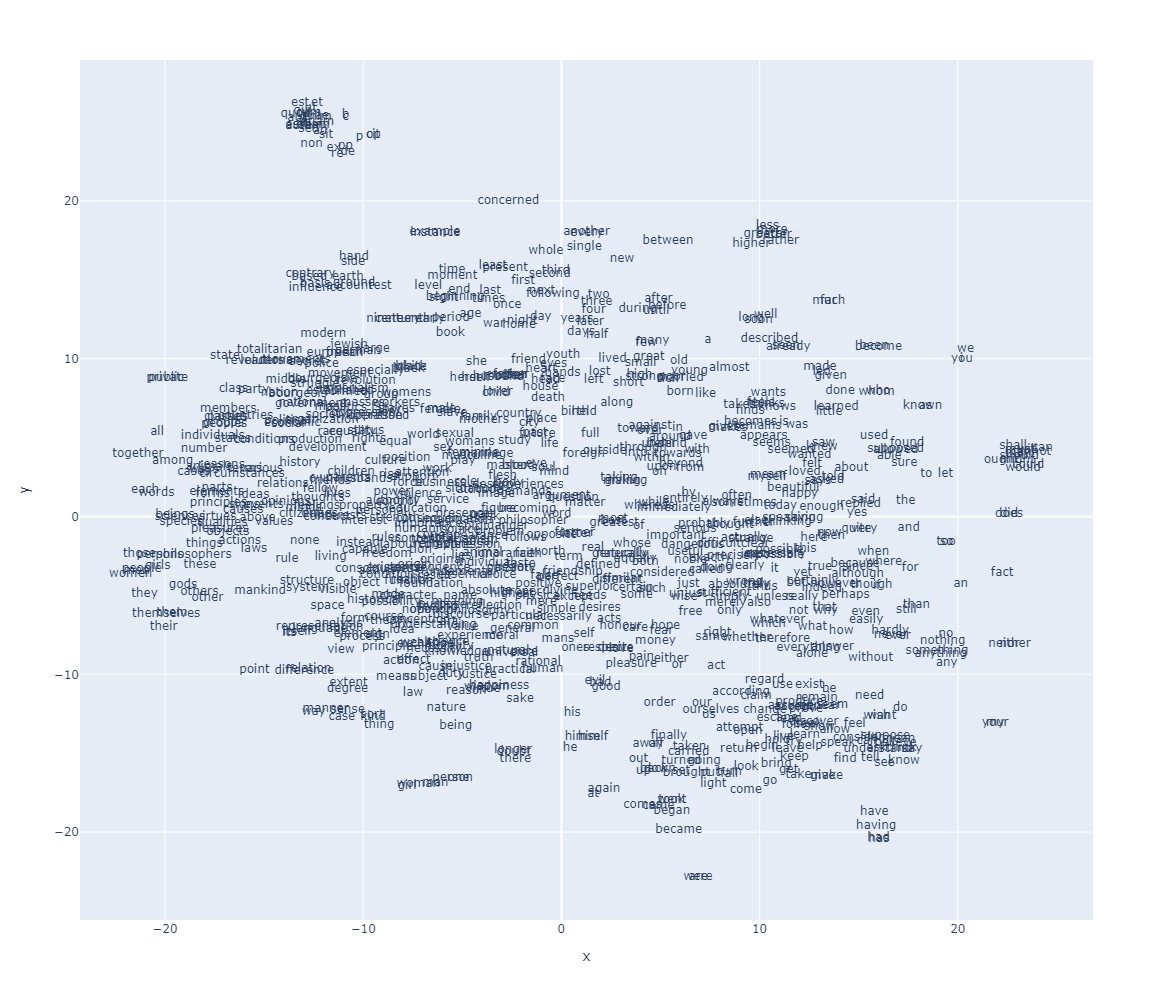

In [109]:
#Plot coordinates 
px.scatter(coords_texts, 'x', 'y', text='label', height=1000).update_traces(mode='text')

#### Analysis
...

### Semantic Algebra
....

#### All Texts

In [110]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# All Texts
def complete_analogy(A, B, C, n=2):
    try:
        return model_all_texts.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [111]:
complete_analogy('importance', 'consequences', 'problem')

[('element', 0.6243058443069458), ('opposite', 0.589812695980072)]

In [112]:
complete_analogy('discover', 'accept', 'lead')

[('change', 0.6353215575218201), ('remain', 0.6253240704536438)]

In [113]:
complete_analogy('economic', 'government', 'lead')

[('follow', 0.7732022404670715), ('learn', 0.6484860777854919)]

In [114]:
complete_analogy('death', 'virtue', 'meaning')

[('wisdom', 0.6988454461097717), ('principle', 0.6839151382446289)]

#### Analysis
...

### t-SNE Plot for FEMALE Author Texts

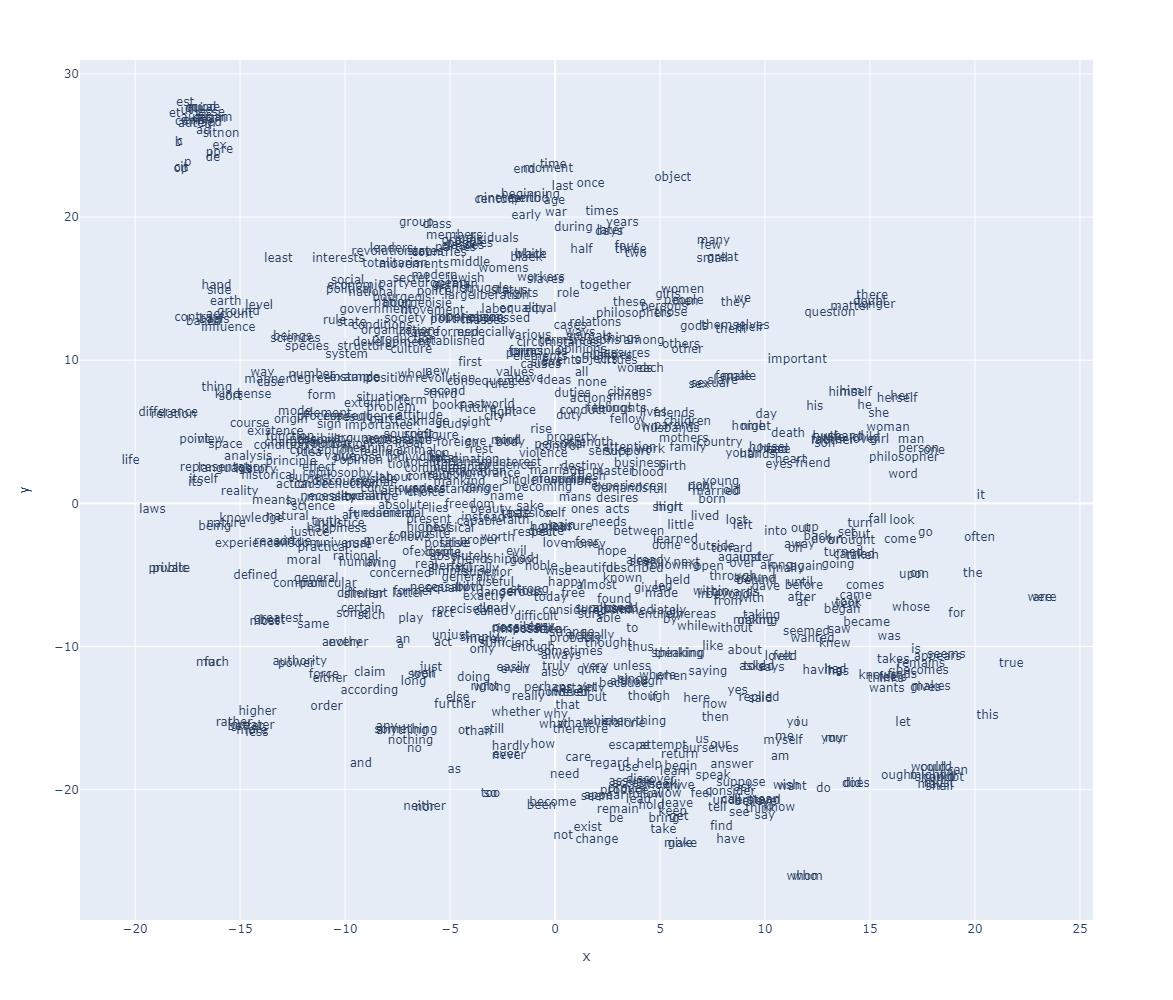

In [115]:
#Plot coordinates 
px.scatter(coords_female, 'x', 'y', text='label', height=1000).update_traces(mode='text')

#### Analysis
....

### t-SNE Plot for MALE Author Texts

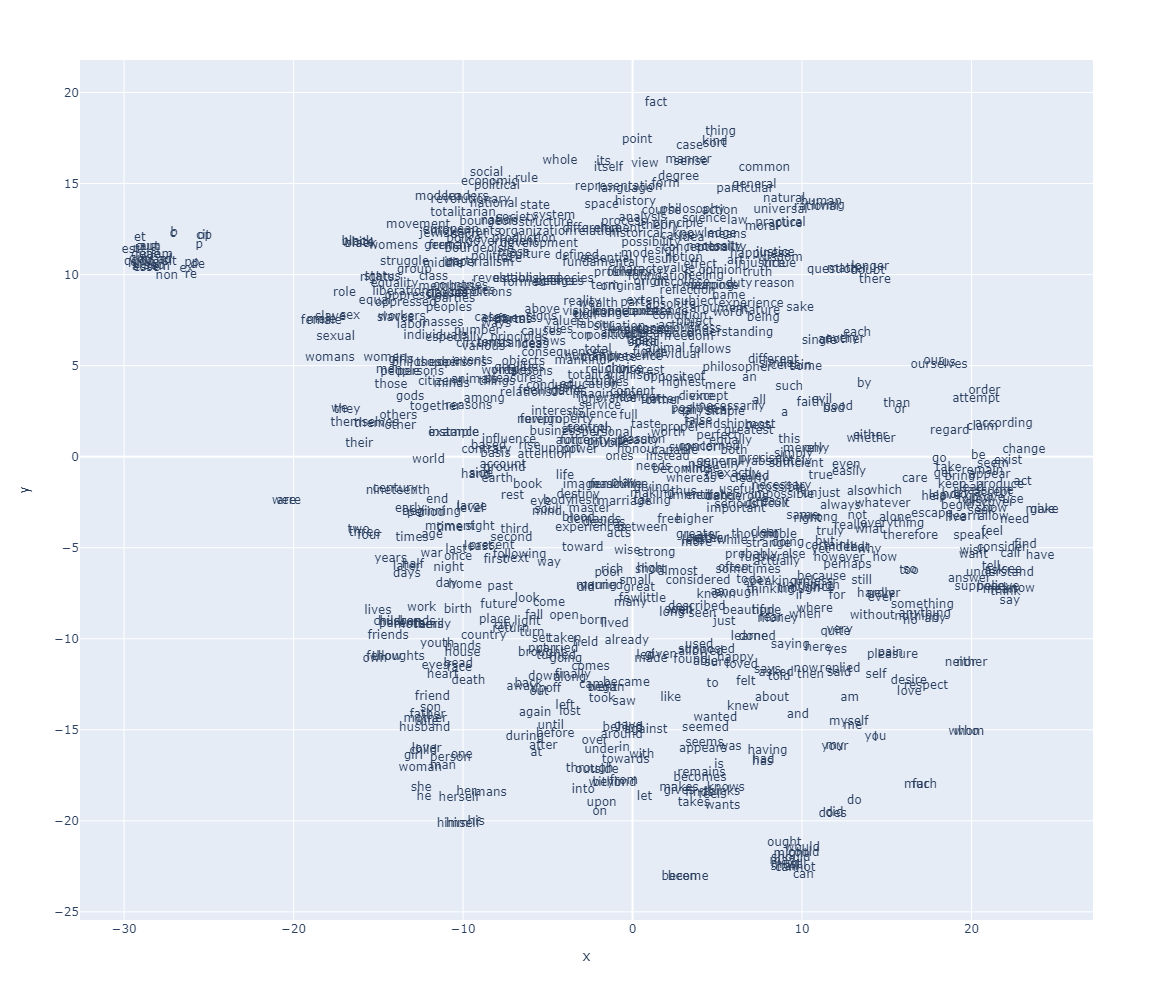

In [116]:
#Plot coordinates 
px.scatter(coords_male, 'x', 'y', text='label', height=1000).update_traces(mode='text')

### t-SNE Plot for ANCIENT Texts

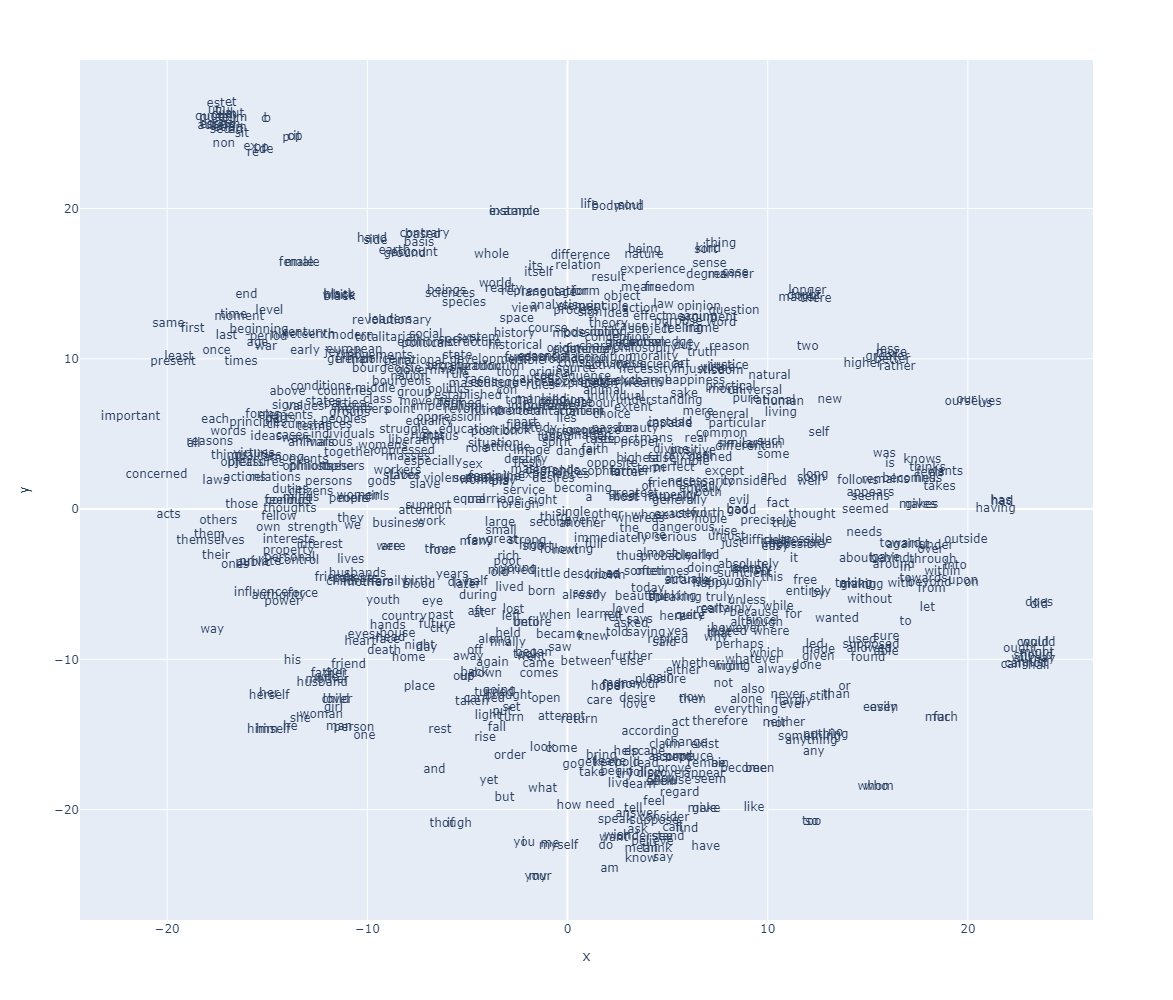

In [117]:
#Plot coordinates 
px.scatter(coords_ancient, 'x', 'y', text='label', height=1000).update_traces(mode='text')

### t-SNE Plot for CLASSICAL Texts

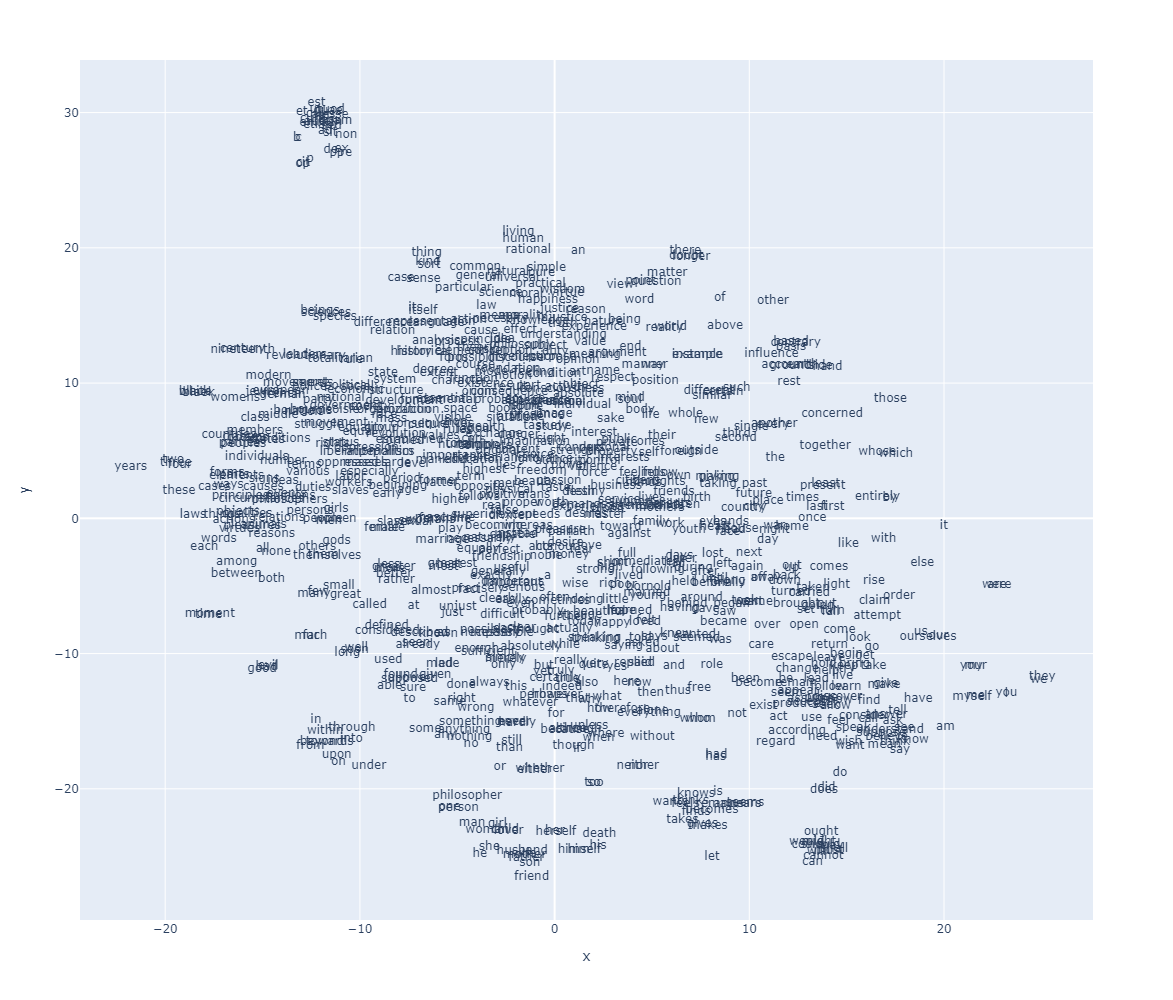

In [118]:
#Plot coordinates 
px.scatter(coords_classical, 'x', 'y', text='label', height=1000).update_traces(mode='text')

### t-SNE Plot for MODERN Texts

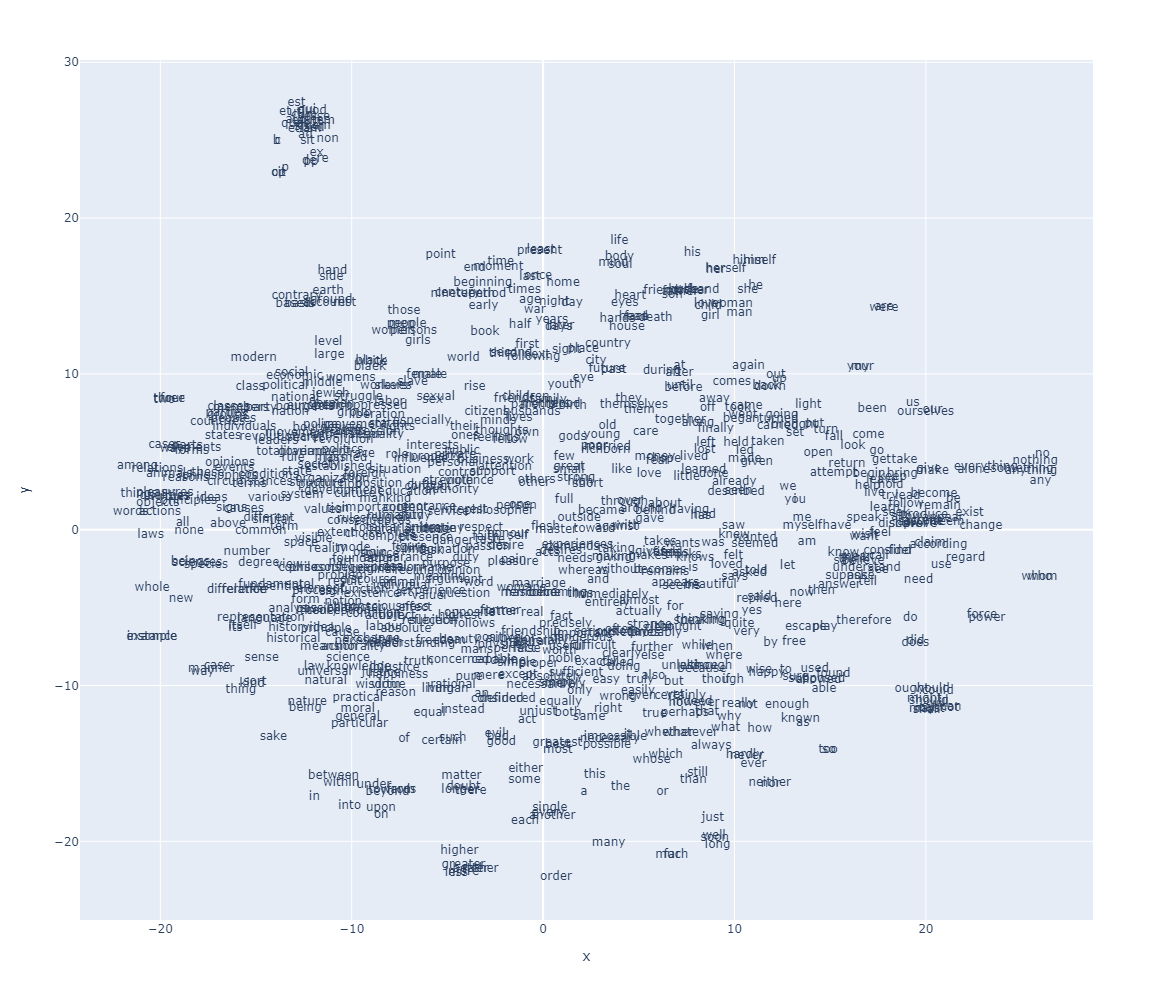

In [119]:
#Plot coordinates 
px.scatter(coords_modern, 'x', 'y', text='label', height=1000).update_traces(mode='text')

#### Analysis
....

### Semantic Algebra

In [120]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# Male Texts
def complete_analogy_male(A, B, C, n=2):
    try:
        return model_male.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [121]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# Female texts
def complete_analogy_female(A, B, C, n=2):
    try:
        return model_female.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

#### FEMALE vs MALE Author Texts Semantic Algebra

In [122]:
#FEMALE
complete_analogy_female('lead', 'seek', 'discover')

[('feel', 0.7642523646354675), ('believe', 0.728032648563385)]

In [123]:
#MALE
complete_analogy_male('lead', 'seek', 'discover')

[('consider', 0.7408979535102844), ('feel', 0.7306882739067078)]

________________________________________________________________________________________________________________________________________

In [124]:
#FEMALE
complete_analogy_female('humanity', 'feminine', 'ignorance')

[('flesh', 0.5683597922325134), ('masculine', 0.5183895826339722)]

In [125]:
#MALE
complete_analogy_male('humanity', 'feminine', 'ignorance')

[('physical', 0.5568299293518066), ('freedom', 0.5444571375846863)]

________________________________________________________________________________________________________________________________________

In [126]:
#FEMALE
complete_analogy_female('pleasures', 'things', 'virtues')

[('principles', 0.6533086895942688), ('words', 0.610150158405304)]

In [127]:
#MALE
complete_analogy_male('pleasures', 'things', 'virtues')

[('principles', 0.6585773229598999), ('words', 0.6414128541946411)]

________________________________________________________________________________________________________________________________________

In [128]:
#FEMALE
complete_analogy_female('religion', 'education', 'freedom')

[('free', 0.4744895100593567), ('assume', 0.46264272928237915)]

In [129]:
#MALE
complete_analogy_male('religion', 'education', 'freedom')

[('husbands', 0.49874797463417053), ('thus', 0.4820350408554077)]

________________________________________________________________________________________________________________________________________

In [130]:
#FEMALE
complete_analogy_female('leaders', 'revolutionary', 'totalitarian')

[('european', 0.6137496829032898), ('political', 0.5984175205230713)]

In [131]:
#MALE
complete_analogy_male('leaders', 'revolutionary', 'totalitarian')

[('political', 0.6747063994407654), ('european', 0.5981352925300598)]

________________________________________________________________________________________________________________________________________

In [132]:
#FEMALE
complete_analogy_female('play', 'womens', 'masculine')

[('workers', 0.5765746831893921), ('blaek', 0.5661029815673828)]

In [133]:
#MALE
complete_analogy_male('play', 'womens', 'masculine')

[('social', 0.600389838218689), ('workers', 0.5775098204612732)]

________________________________________________________________________________________________________________________________________

In [134]:
#FEMALE
complete_analogy_female('pure', 'divine', 'mans')

[('master', 0.5445314049720764), ('his', 0.5041492581367493)]

In [135]:
#MALE
complete_analogy_male('pure', 'divine', 'mans')

[('her', 0.5004955530166626), ('womans', 0.46960964798927307)]

________________________________________________________________________________________________________________________________________

In [136]:
#FEMALE
complete_analogy_female('meaning', 'value', 'understanding')

[('labour', 0.6093273162841797), ('greater', 0.5478382110595703)]

In [137]:
#MALE
complete_analogy_male('meaning', 'value', 'understanding')

[('labour', 0.6225528717041016), ('freedom', 0.6171186566352844)]

#### Analysis
...

#### ANCIENT vs CLASSICAL vs MODERN Texts Semantic Algebra

In [138]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# ANCEINT texts
def complete_analogy_ancient(A, B, C, n=2):
    try:
        return model_ancient.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [139]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# CLASSICAL texts
def complete_analogy_classical(A, B, C, n=2):
    try:
        return model_classical.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [140]:
#𝐴:𝐵::𝐶:𝐷?→𝐵−𝐴+𝐶=𝐷
# MODERN texts
def complete_analogy_modern(A, B, C, n=2):
    try:
        return model_modern.wv.most_similar(positive=[B, C], negative=[A])[0:n]
    except KeyError as e:
        print('Error:', e)
        return None

In [141]:
#ANCIENT
complete_analogy_ancient('people', 'classes', 'groups')

[('bourgeois', 0.7378024458885193), ('parties', 0.6962724924087524)]

In [142]:
#CLASSICAL
complete_analogy_classical('people', 'classes', 'groups')

[('bourgeois', 0.7102118134498596), ('parts', 0.706534206867218)]

In [143]:
#MODERN
complete_analogy_modern('people', 'classes', 'groups')

[('parties', 0.7044128775596619), ('countries', 0.6912365555763245)]

________________________________________________________________________________________________________________________________________

In [144]:
#ANCIENT
complete_analogy_ancient('mankind', 'humanity', 'totalitarianism')

[('presence', 0.7560791373252869), ('development', 0.706457793712616)]

In [145]:
#CLASSICAL
complete_analogy_classical('mankind', 'humanity', 'totalitarianism')

[('source', 0.7277366518974304), ('con', 0.7131409645080566)]

In [146]:
#MODERN
complete_analogy_modern('mankind', 'humanity', 'totalitarianism')

[('appearance', 0.7350460290908813), ('presence', 0.7322462201118469)]

________________________________________________________________________________________________________________________________________

In [147]:
#ANCIENT
complete_analogy_ancient('condition', 'existence', 'function')

[('discourse', 0.6402854323387146), ('possibility', 0.6386960744857788)]

In [148]:
#CLASSICAL
complete_analogy_classical('condition', 'existence', 'function')

[('development', 0.6519410610198975), ('discourse', 0.6160063147544861)]

In [149]:
#MODERN
complete_analogy_modern('condition', 'existence', 'function')

[('complete', 0.6013723611831665), ('development', 0.5890188813209534)]

________________________________________________________________________________________________________________________________________

In [150]:
#ANCIENT
complete_analogy_ancient('mass', 'race', 'production')

[('sciences', 0.5739710927009583), ('development', 0.5663877725601196)]

In [151]:
#CLASSICAL
complete_analogy_classical('mass', 'race', 'production')

[('sciences', 0.6517109870910645), ('species', 0.6511678695678711)]

In [152]:
#MODERN
complete_analogy_modern('mass', 'race', 'production')

[('mode', 0.5198338627815247), ('sciences', 0.508427083492279)]

________________________________________________________________________________________________________________________________________

In [153]:
#ANCIENT
complete_analogy_ancient('seek', 'follow', 'discover')

[('find', 0.7093759775161743), ('learn', 0.6301907896995544)]

In [154]:
#CLASSICAL
complete_analogy_classical('seek', 'follow', 'discover')

[('find', 0.6848392486572266), ('show', 0.6482301354408264)]

In [155]:
#MODERN
complete_analogy_modern('seek', 'follow', 'discover')

[('find', 0.6945613026618958), ('show', 0.6706656813621521)]

________________________________________________________________________________________________________________________________________

In [156]:
#ANCIENT
complete_analogy_ancient('life', 'death', 'happiness')

[('pain', 0.5637077689170837), ('sake', 0.5506163239479065)]

In [157]:
#CLASSICAL
complete_analogy_classical('life', 'death', 'happiness')

[('sake', 0.5197551846504211), ('pain', 0.5091485977172852)]

In [158]:
#MODERN
complete_analogy_modern('life', 'death', 'happiness')

[('pain', 0.5679351091384888), ('pleasure', 0.5310956835746765)]

#### Analysis
....

### Overall Analysis